In [193]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import sys
import nltk

%matplotlib inline
plt.style.use('seaborn')
plt.rcParams['figure.figsize'] = [18, 10]

In [2]:
#loading the data
train_dataset = pd.read_json("Kickstarter_2022-12-15T03_20_04_521Z.json", lines=True)
actual_data = [train_dataset["data"][k] for k in range(len(train_dataset))]
train_dataset.head()

,table_id,robot_id,run_id,data
0,Kickstarter,Kickstarter,Kickstarter_2022-12-15T03_20_04_521Z,"{'id': 2014941593, 'photo': {'key': 'assets/03..."
1,Kickstarter,Kickstarter,Kickstarter_2022-12-15T03_20_04_521Z,"{'id': 1932477189, 'photo': {'key': 'assets/03..."
2,Kickstarter,Kickstarter,Kickstarter_2022-12-15T03_20_04_521Z,"{'id': 1127603300, 'photo': {'key': 'assets/03..."
3,Kickstarter,Kickstarter,Kickstarter_2022-12-15T03_20_04_521Z,"{'id': 640015337, 'photo': {'key': 'assets/039..."
4,Kickstarter,Kickstarter,Kickstarter_2022-12-15T03_20_04_521Z,"{'id': 233782977, 'photo': {'key': 'assets/039..."


In [3]:
#creating the dataset
train_data = pd.DataFrame(actual_data)
train_data.head()

,id,photo,name,blurb,goal,pledged,state,slug,disable_communication,country,...,location,category,profile,spotlight,urls,source_url,friends,is_starred,is_backing,permissions
0,2014941593,{'key': 'assets/038/408/400/93382a88c9dbc1af95...,Driving School Stories of Celebrity Teens,Live camera installed inside an actual driving...,120000,26.0,failed,driving-school-stories-of-celebrity-teens,False,US,...,"{'id': 2363796, 'name': 'Beverly Hills', 'slug...","{'id': 292, 'name': 'Comedy', 'analytics_name'...","{'id': 4465571, 'project_id': 4465571, 'state'...",False,{'web': {'project': 'https://www.kickstarter.c...,https://www.kickstarter.com/discover/categorie...,NaN,NaN,NaN,NaN
1,1932477189,{'key': 'assets/039/331/847/6e37eed9904bea5a61...,Crime Squad 3D Blu-ray - REMASTER3D!,Crime Squad 3D in Superstereovision! Remastere...,2000,2541.0,live,crime-squad-3d-blu-ray,False,GB,...,"{'id': 19344, 'name': 'Edinburgh', 'slug': 'ed...","{'id': 292, 'name': 'Comedy', 'analytics_name'...","{'id': 4516474, 'project_id': 4516474, 'state'...",False,{'web': {'project': 'https://www.kickstarter.c...,https://www.kickstarter.com/discover/categorie...,NaN,NaN,NaN,NaN
2,1127603300,{'key': 'assets/039/363/407/a22ed33f3e39868214...,Help Us Get To Los Angeles!,"As winners of the 48-Hour Film Project, we hop...",16000,106.0,live,help-subharmonic-city-get-to-hollywood,False,US,...,"{'id': 2397816, 'name': 'El Paso', 'slug': 'el...","{'id': 292, 'name': 'Comedy', 'analytics_name'...","{'id': 4518603, 'project_id': 4518603, 'state'...",False,{'web': {'project': 'https://www.kickstarter.c...,https://www.kickstarter.com/discover/categorie...,NaN,NaN,NaN,NaN
3,640015337,{'key': 'assets/039/441/179/34d28696f4d6b0e43c...,SECRET,A Superhero Comedy,50000,501.0,live,secret-0,False,US,...,"{'id': 2416847, 'name': 'Hampton', 'slug': 'ha...","{'id': 292, 'name': 'Comedy', 'analytics_name'...","{'id': 4521089, 'project_id': 4521089, 'state'...",False,{'web': {'project': 'https://www.kickstarter.c...,https://www.kickstarter.com/discover/categorie...,NaN,NaN,NaN,NaN
4,233782977,{'key': 'assets/039/379/732/36d936f41c46751a38...,PINK (Short Film),A neurotic actress falls into crisis at her bi...,2000,1176.0,live,pink-short-film,False,US,...,"{'id': 2379574, 'name': 'Chicago', 'slug': 'ch...","{'id': 292, 'name': 'Comedy', 'analytics_name'...","{'id': 4519929, 'project_id': 4519929, 'state'...",False,{'web': {'project': 'https://www.kickstarter.c...,https://www.kickstarter.com/discover/categorie...,NaN,NaN,NaN,NaN


In [4]:
#exploring some of the features
print("The features of this dataset are: ", train_data.keys())
print(" \n \n blurb: ", train_data["blurb"][0], "\n \n ", "location: ", train_data["location"][0], "\n \n ", "category: ", train_data["category"][0], "\n \n ", "profile: ", train_data["profile"][0])

The features of this dataset are:  Index(['id', 'photo', 'name', 'blurb', 'goal', 'pledged', 'state', 'slug',
       'disable_communication', 'country', 'country_displayable_name',
       'currency', 'currency_symbol', 'currency_trailing_code', 'deadline',
       'state_changed_at', 'created_at', 'launched_at', 'staff_pick',
       'is_starrable', 'backers_count', 'static_usd_rate', 'usd_pledged',
       'converted_pledged_amount', 'fx_rate', 'usd_exchange_rate',
       'current_currency', 'usd_type', 'creator', 'location', 'category',
       'profile', 'spotlight', 'urls', 'source_url', 'friends', 'is_starred',
       'is_backing', 'permissions'],
      dtype='object')
 
 
 blurb:  Live camera installed inside an actual driving school 
 
  location:  {'id': 2363796, 'name': 'Beverly Hills', 'slug': 'beverly-hills-ca', 'short_name': 'Beverly Hills, CA', 'displayable_name': 'Beverly Hills, CA', 'localized_name': 'Beverly Hills', 'country': 'US', 'state': 'CA', 'type': 'Town', 'is_root':

In [5]:
#writing a function to create the final dataset
def clean_concat(list_of_datasets):
    data_frames=[]
    for dataset in list_of_datasets:
        dataset = pd.read_json(dataset, lines=True)
        actual_data = [dataset["data"][k] for k in range(len(dataset))]
        data_frames.append(pd.DataFrame(actual_data))
    final_dataset = pd.concat([data for data in data_frames])
    return(final_dataset)

In [6]:
# concatenating creates problems with the indexes 
#training_df = clean_concat(["/Users/ghitaalami/Coding Projects/Berkeley Projects/ML-and-Data-Analytics/Project/Kickstarter_2022-12-15T03_20_04_521Z.json", "/Users/ghitaalami/Coding Projects/Berkeley Projects/ML-and-Data-Analytics/Project/Kickstarter_2023-01-05T03_20_04_136Z.json"])

In [7]:
training_df = train_data

In [8]:
#let's decide which columns should be dropped
training_df["photo"][0] #should probably be dropped for now
training_df["state"][0] #our label 
training_df["urls"][0] #should probably be dropped 
training_df["currency"][10] #should be dropped because "currency_symbol" contains the same information
training_df["source_url"][200] #should probably be dropped for now 
training_df["friends"][1600] #should check if only contains NaNs
training_df["permissions"][1000] #should check if only contains NaNs



nan

In [9]:
#modify the clean_concat function to drop some columns
def clean_concat_drop(list_of_datasets, list_of_columns):
    data_frames=[]
    for dataset in list_of_datasets:
        dataset = pd.read_json(dataset, lines=True)
        actual_data = [dataset["data"][k] for k in range(len(dataset))]
        data_frames.append(pd.DataFrame(actual_data))
    final_dataset = pd.concat([data for data in data_frames])
    final_dataset = final_dataset.drop(list_of_columns)
    return(final_dataset)

In [10]:
#dropping some useless features for now
training_df = training_df.drop(["photo", "urls", "currency", "source_url" ], axis=1)

In [11]:
training_df["profile"][0]

{'id': 4465571,
 'project_id': 4465571,
 'state': 'inactive',
 'state_changed_at': 1661625074,
 'name': None,
 'blurb': None,
 'background_color': None,
 'text_color': None,
 'link_background_color': None,
 'link_text_color': None,
 'link_text': None,
 'link_url': None,
 'show_feature_image': False,
 'background_image_opacity': 0.8,
 'should_show_feature_image_section': True,
 'feature_image_attributes': {'image_urls': {'default': 'https://ksr-ugc.imgix.net/assets/038/408/400/93382a88c9dbc1af95992c496abd38e7_original.jpeg?ixlib=rb-4.0.2&crop=faces&w=1552&h=873&fit=crop&v=1661625239&auto=format&frame=1&q=92&s=04b08346a71d90b32a7cbb28be0972c2',
   'baseball_card': 'https://ksr-ugc.imgix.net/assets/038/408/400/93382a88c9dbc1af95992c496abd38e7_original.jpeg?ixlib=rb-4.0.2&crop=faces&w=560&h=315&fit=crop&v=1661625239&auto=format&frame=1&q=92&s=c8db7a1b2282afbd6c85813346d69682'}}}

In [12]:
#Let's try a first model with less features
training_df = training_df.drop("country_displayable_name", axis=1)
training_df = training_df.drop(["is_backing", "is_starred", "spotlight", "friends", "permissions", "disable_communication"], axis=1)

In [13]:
training_df.head(5)

,id,name,blurb,goal,pledged,state,slug,country,currency_symbol,currency_trailing_code,...,usd_pledged,converted_pledged_amount,fx_rate,usd_exchange_rate,current_currency,usd_type,creator,location,category,profile
0,2014941593,Driving School Stories of Celebrity Teens,Live camera installed inside an actual driving...,120000,26.0,failed,driving-school-stories-of-celebrity-teens,US,$,True,...,26.0,26.0,1.000000,1.000000,USD,international,"{'id': 1097743720, 'name': 'Kamran Rafizadeh F...","{'id': 2363796, 'name': 'Beverly Hills', 'slug...","{'id': 292, 'name': 'Comedy', 'analytics_name'...","{'id': 4465571, 'project_id': 4465571, 'state'..."
1,1932477189,Crime Squad 3D Blu-ray - REMASTER3D!,Crime Squad 3D in Superstereovision! Remastere...,2000,2541.0,live,crime-squad-3d-blu-ray,GB,£,False,...,3082.93718733,3137.0,1.234778,1.234778,USD,international,"{'id': 115821324, 'name': 'Andrew Murchie', 's...","{'id': 19344, 'name': 'Edinburgh', 'slug': 'ed...","{'id': 292, 'name': 'Comedy', 'analytics_name'...","{'id': 4516474, 'project_id': 4516474, 'state'..."
2,1127603300,Help Us Get To Los Angeles!,"As winners of the 48-Hour Film Project, we hop...",16000,106.0,live,help-subharmonic-city-get-to-hollywood,US,$,True,...,106.0,106.0,1.000000,1.000000,USD,international,"{'id': 475346952, 'name': 'Subharmonic City Pr...","{'id': 2397816, 'name': 'El Paso', 'slug': 'el...","{'id': 292, 'name': 'Comedy', 'analytics_name'...","{'id': 4518603, 'project_id': 4518603, 'state'..."
3,640015337,SECRET,A Superhero Comedy,50000,501.0,live,secret-0,US,$,True,...,501.0,501.0,1.000000,1.000000,USD,international,"{'id': 66032665, 'name': 'Brian Cutter', 'slug...","{'id': 2416847, 'name': 'Hampton', 'slug': 'ha...","{'id': 292, 'name': 'Comedy', 'analytics_name'...","{'id': 4521089, 'project_id': 4521089, 'state'..."
4,233782977,PINK (Short Film),A neurotic actress falls into crisis at her bi...,2000,1176.0,live,pink-short-film,US,$,True,...,1176.0,1176.0,1.000000,1.000000,USD,international,"{'id': 1827951120, 'name': 'Jackson Cook', 'sl...","{'id': 2379574, 'name': 'Chicago', 'slug': 'ch...","{'id': 292, 'name': 'Comedy', 'analytics_name'...","{'id': 4519929, 'project_id': 4519929, 'state'..."


In [14]:
#only keeping the name of the city in the location
training_df["location"] = [training_df["location"][k]["name"] if type(training_df["location"][k]) is dict else 'nan' for k in range(len(training_df)) ]
training_df.head(5)

,id,name,blurb,goal,pledged,state,slug,country,currency_symbol,currency_trailing_code,...,usd_pledged,converted_pledged_amount,fx_rate,usd_exchange_rate,current_currency,usd_type,creator,location,category,profile
0,2014941593,Driving School Stories of Celebrity Teens,Live camera installed inside an actual driving...,120000,26.0,failed,driving-school-stories-of-celebrity-teens,US,$,True,...,26.0,26.0,1.000000,1.000000,USD,international,"{'id': 1097743720, 'name': 'Kamran Rafizadeh F...",Beverly Hills,"{'id': 292, 'name': 'Comedy', 'analytics_name'...","{'id': 4465571, 'project_id': 4465571, 'state'..."
1,1932477189,Crime Squad 3D Blu-ray - REMASTER3D!,Crime Squad 3D in Superstereovision! Remastere...,2000,2541.0,live,crime-squad-3d-blu-ray,GB,£,False,...,3082.93718733,3137.0,1.234778,1.234778,USD,international,"{'id': 115821324, 'name': 'Andrew Murchie', 's...",Edinburgh,"{'id': 292, 'name': 'Comedy', 'analytics_name'...","{'id': 4516474, 'project_id': 4516474, 'state'..."
2,1127603300,Help Us Get To Los Angeles!,"As winners of the 48-Hour Film Project, we hop...",16000,106.0,live,help-subharmonic-city-get-to-hollywood,US,$,True,...,106.0,106.0,1.000000,1.000000,USD,international,"{'id': 475346952, 'name': 'Subharmonic City Pr...",El Paso,"{'id': 292, 'name': 'Comedy', 'analytics_name'...","{'id': 4518603, 'project_id': 4518603, 'state'..."
3,640015337,SECRET,A Superhero Comedy,50000,501.0,live,secret-0,US,$,True,...,501.0,501.0,1.000000,1.000000,USD,international,"{'id': 66032665, 'name': 'Brian Cutter', 'slug...",Hampton,"{'id': 292, 'name': 'Comedy', 'analytics_name'...","{'id': 4521089, 'project_id': 4521089, 'state'..."
4,233782977,PINK (Short Film),A neurotic actress falls into crisis at her bi...,2000,1176.0,live,pink-short-film,US,$,True,...,1176.0,1176.0,1.000000,1.000000,USD,international,"{'id': 1827951120, 'name': 'Jackson Cook', 'sl...",Chicago,"{'id': 292, 'name': 'Comedy', 'analytics_name'...","{'id': 4519929, 'project_id': 4519929, 'state'..."


In [15]:
import json

# convert the 'profile' column to a string representation of the dictionary
training_df['profile_str'] = training_df['profile'].apply(json.dumps)

# group the dataframe by the creator id and get all the project ids associated with them
previous_launchers = training_df.groupby('profile_str')['id'].apply(list)

# create a dictionary to map project ids to creator ids
project_to_creator = training_df.set_index('id')['profile'].apply(lambda x: x['id']).to_dict()

# create a new column that checks if the creator has launched any other projects
training_df['previous_launcher'] = training_df['id'].apply(lambda x: True if project_to_creator[x] in previous_launchers.values else False)

# drop the temporary 'profile_str' column
training_df = training_df.drop('profile_str', axis=1)


In [16]:
training_df["creator"][0]

{'id': 1097743720,
 'name': 'Kamran Rafizadeh Ford',
 'is_registered': None,
 'is_email_verified': None,
 'chosen_currency': None,
 'is_superbacker': None,
 'avatar': {'thumb': 'https://ksr-ugc.imgix.net/assets/038/408/529/23acdbc7721f02dd0bcf7b37b0097774_original.jpg?ixlib=rb-4.0.2&w=40&h=40&fit=crop&v=1661626266&auto=format&frame=1&q=92&s=19aff20078bdd94e2b86be2d1d7ff47b',
  'small': 'https://ksr-ugc.imgix.net/assets/038/408/529/23acdbc7721f02dd0bcf7b37b0097774_original.jpg?ixlib=rb-4.0.2&w=80&h=80&fit=crop&v=1661626266&auto=format&frame=1&q=92&s=3695cd52b441223414a2244976e991a7',
  'medium': 'https://ksr-ugc.imgix.net/assets/038/408/529/23acdbc7721f02dd0bcf7b37b0097774_original.jpg?ixlib=rb-4.0.2&w=160&h=160&fit=crop&v=1661626266&auto=format&frame=1&q=92&s=a41a7bcd1de8422fa77da0e86802878d'},
 'urls': {'web': {'user': 'https://www.kickstarter.com/profile/1097743720'},
  'api': {'user': 'https://api.kickstarter.com/v1/users/1097743720?signature=1671160818.65e537e0b50125612280cc2d011ad

In [17]:
# extract 'name' and 'is_superbacker' from the 'creator' column
training_df['is_superbacker'] = training_df['creator'].apply(lambda x: x.get('is_superbacker'))
training_df['creator'] = training_df['creator'].apply(lambda x: x.get('name'))


In [18]:
training_df['pledge_per_backer'] = np.where(training_df['backers_count'] == 0, 0, training_df['pledged'] / training_df['backers_count'])
training_df = training_df.drop(['pledged', 'backers_count', 'currency_trailing_code'], axis=1)


In [19]:
training_df = training_df.drop([ 'is_starrable'], axis=1)

In [20]:
training_df = training_df.drop([ 'fx_rate'], axis=1)

In [21]:
#convert the goal to USD
training_df['goal_usd'] = training_df['goal'] * training_df['static_usd_rate']
training_df['goal_usd'] = training_df['goal_usd'].astype(float)
training_df['usd_pledged'] = training_df['usd_pledged'].astype(float)


In [22]:
#percentage of success of the campaign
training_df['percentage of success'] = (training_df['usd_pledged'] / training_df['goal_usd']) * 100


In [23]:
training_df['original_currency'] = training_df['currency_symbol']
training_df = training_df.drop(['currency_symbol'], axis = 1)

In [24]:
training_df.head()

,id,name,blurb,goal,state,slug,country,deadline,state_changed_at,created_at,...,creator,location,category,profile,previous_launcher,is_superbacker,pledge_per_backer,goal_usd,percentage of success,original_currency
0,2014941593,Driving School Stories of Celebrity Teens,Live camera installed inside an actual driving...,120000,failed,driving-school-stories-of-celebrity-teens,US,1671048120,1671048122,1661625074,...,Kamran Rafizadeh Ford,Beverly Hills,"{'id': 292, 'name': 'Comedy', 'analytics_name'...","{'id': 4465571, 'project_id': 4465571, 'state'...",False,None,13.000000,120000.00000,0.021667,$
1,1932477189,Crime Squad 3D Blu-ray - REMASTER3D!,Crime Squad 3D in Superstereovision! Remastere...,2000,live,crime-squad-3d-blu-ray,GB,1673087556,1670495559,1669548519,...,Andrew Murchie,Edinburgh,"{'id': 292, 'name': 'Comedy', 'analytics_name'...","{'id': 4516474, 'project_id': 4516474, 'state'...",False,None,43.810345,2426.55426,127.050000,£
2,1127603300,Help Us Get To Los Angeles!,"As winners of the 48-Hour Film Project, we hop...",16000,live,help-subharmonic-city-get-to-hollywood,US,1675634857,1670450860,1669840906,...,Subharmonic City Productions,El Paso,"{'id': 292, 'name': 'Comedy', 'analytics_name'...","{'id': 4518603, 'project_id': 4518603, 'state'...",False,None,21.200000,16000.00000,0.662500,$
3,640015337,SECRET,A Superhero Comedy,50000,live,secret-0,US,1675519162,1670335164,1670252610,...,Brian Cutter,Hampton,"{'id': 292, 'name': 'Comedy', 'analytics_name'...","{'id': 4521089, 'project_id': 4521089, 'state'...",False,None,250.500000,50000.00000,1.002000,$
4,233782977,PINK (Short Film),A neurotic actress falls into crisis at her bi...,2000,live,pink-short-film,US,1672725540,1670035783,1670028130,...,Jackson Cook,Chicago,"{'id': 292, 'name': 'Comedy', 'analytics_name'...","{'id': 4519929, 'project_id': 4519929, 'state'...",False,None,106.909091,2000.00000,58.800000,$


In [25]:
training_df.columns

Index(['id', 'name', 'blurb', 'goal', 'state', 'slug', 'country', 'deadline',
       'state_changed_at', 'created_at', 'launched_at', 'staff_pick',
       'static_usd_rate', 'usd_pledged', 'converted_pledged_amount',
       'usd_exchange_rate', 'current_currency', 'usd_type', 'creator',
       'location', 'category', 'profile', 'previous_launcher',
       'is_superbacker', 'pledge_per_backer', 'goal_usd',
       'percentage of success', 'original_currency'],
      dtype='object')

In [26]:
training_df = training_df.drop([ 'profile', 'state_changed_at', 'static_usd_rate', 'converted_pledged_amount', 'usd_exchange_rate', 'current_currency', 'usd_type'], axis=1)

In [27]:
# extract 'slug' and 'color' from category and create new columns
training_df['campaign_color'] = training_df['category'].apply(lambda x: x['color'])
training_df['category'] = training_df['category'].apply(lambda x: x['slug'])



In [28]:
training_df.columns

Index(['id', 'name', 'blurb', 'goal', 'state', 'slug', 'country', 'deadline',
       'created_at', 'launched_at', 'staff_pick', 'usd_pledged', 'creator',
       'location', 'category', 'previous_launcher', 'is_superbacker',
       'pledge_per_backer', 'goal_usd', 'percentage of success',
       'original_currency', 'campaign_color'],
      dtype='object')

In [29]:
# perform lemmatization, stemming, remove_stopwords, tokenization on the texts remaining
# gather all the texts in one column ({location: 'Paris' , category: 'comedy'} become {text: 'location_Paris, category_comedy'} for example)
# fit a classification model on the resulting dataset

### Changing to lowercase, remove punctuation, digits, make slug nicer, etc

In [30]:
training_df['slug'] = training_df['slug'].apply(lambda x: x.replace("-", " " ))

In [31]:
training_df[['name','blurb','slug', 'country', 'creator', 'location', 'category']] = training_df[['name','blurb','slug', 'country', 'creator', 'location', 'category']].applymap(str.lower)

In [32]:
#Remove Punctations 
from string import punctuation

#You can get this function from our discussion session code. However, we leave it as a blank for a practice.
def remove_punctuation(document):

    no_punct = ''.join([character for character in document if character not in punctuation])
    
    return no_punct

training_df[['name','blurb','slug', 'country', 'creator', 'location', 'category']] = training_df[['name','blurb','slug', 'country', 'creator', 'location', 'category']].applymap(remove_punctuation)

#Remove Digits 

def remove_digit(document): 
    
    no_digit = ''.join([character for character in document if not character.isdigit()])
              
    return no_digit

training_df[['name','blurb','slug', 'country', 'creator', 'location', 'category']] = training_df[['name','blurb','slug', 'country', 'creator', 'location', 'category']].applymap(remove_digit)

### Tokenization, remove stopwords and combine into one text column

In [33]:
training_zacky = training_df.copy()

In [34]:
#Tokenize

from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')
training_df[['name','blurb','slug', 'country', 'creator', 'location', 'category']] = training_df[['name','blurb','slug', 'country', 'creator', 'location', 'category']].applymap(word_tokenize)

#Remove Stopwords

from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def remove_stopwords(document):
    
    words = [word for word in document if not word in stop_words]
    
    return words

training_df[['name','blurb','slug', 'country', 'creator', 'location', 'category']] = training_df[['name','blurb','slug', 'country', 'creator', 'location', 'category']].applymap(remove_stopwords)

#We use porter stemming 

from nltk.stem import PorterStemmer

porter = PorterStemmer()

def stemmer(document):
    
    stemmed_document = [porter.stem(word) for word in document]
    
    return stemmed_document

training_df[['name','blurb','slug', 'country', 'creator', 'location', 'category']]= training_df[['name','blurb','slug', 'country', 'creator', 'location', 'category']].applymap(stemmer)

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/mehdibadri/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/mehdibadri/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [35]:
training_df.head(5)

,id,name,blurb,goal,state,slug,country,deadline,created_at,launched_at,...,creator,location,category,previous_launcher,is_superbacker,pledge_per_backer,goal_usd,percentage of success,original_currency,campaign_color
0,2014941593,"[drive, school, stori, celebr, teen]","[live, camera, instal, insid, actual, drive, s...",120000,failed,"[drive, school, stori, celebr, teen]",[us],1671048120,1661625074,1670554364,...,"[kamran, rafizadeh, ford]","[beverli, hill]","[film, videocomedi]",False,None,13.000000,120000.00000,0.021667,$,16734574
1,1932477189,"[crime, squad, bluray, remasterd]","[crime, squad, superstereovis, remast, origin,...",2000,live,"[crime, squad, blu, ray]",[gb],1673087556,1669548519,1670495556,...,"[andrew, murchi]",[edinburgh],"[film, videocomedi]",False,None,43.810345,2426.55426,127.050000,£,16734574
2,1127603300,"[help, us, get, lo, angel]","[winner, hour, film, project, hope, head, film...",16000,live,"[help, subharmon, citi, get, hollywood]",[us],1675634857,1669840906,1670450857,...,"[subharmon, citi, product]","[el, paso]","[film, videocomedi]",False,None,21.200000,16000.00000,0.662500,$,16734574
3,640015337,[secret],"[superhero, comedi]",50000,live,[secret],[us],1675519162,1670252610,1670335162,...,"[brian, cutter]",[hampton],"[film, videocomedi]",False,None,250.500000,50000.00000,1.002000,$,16734574
4,233782977,"[pink, short, film]","[neurot, actress, fall, crisi, big, audit, rea...",2000,live,"[pink, short, film]",[us],1672725540,1670028130,1670035781,...,"[jackson, cook]",[chicago],"[film, videocomedi]",False,None,106.909091,2000.00000,58.800000,$,16734574


In [36]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier

#process the location into onel single string
training_df["location"]= training_df["location"].apply(lambda x : str(''.join(x)))
training_df["original_currency"] = training_df["original_currency"].apply(lambda x : str(x))

#propress the list features into string
training_df['country'] = training_df['country'].apply(lambda x: str(x))
training_df['category'] = training_df['category'].apply(lambda x: str(x))

# Encode the categorical features as integers
le = LabelEncoder()
training_df['state'] = le.fit_transform(training_df['state'])
training_df['country'] = le.fit_transform(training_df['country'])
training_df['category'] = le.fit_transform(training_df['category'])
training_df["location"] = le.fit_transform(training_df["location"])
training_df["original_currency"] = le.fit_transform(training_df["original_currency"])


In [37]:
import gensim

# Create the Word2Vec model
model = gensim.models.Word2Vec(sentences=training_df['name'], vector_size=100, min_count=1)


In [38]:
# Function to convert a list of words to a vector
def get_word_vectors(words):
    vectors = []
    for word in words:
        if word in model.wv:
            vectors.append(model.wv[word])
    if vectors:
        return np.mean(vectors, axis=0)
    else:
        return np.zeros(100)

In [39]:
# Apply the function to the 'name' column to get the embeddings
training_df['name_embeddings'] = training_df['name'].apply(get_word_vectors)

In [40]:
# Apply the function to other columns to get the embeddings
training_df['blurb_embeddings'] = training_df['blurb'].apply(get_word_vectors)
training_df['slug_embeddings'] = training_df['slug'].apply(get_word_vectors)
training_df['creator_embeddings'] = training_df['creator'].apply(get_word_vectors)

In [41]:
training_df.head()

,id,name,blurb,goal,state,slug,country,deadline,created_at,launched_at,...,is_superbacker,pledge_per_backer,goal_usd,percentage of success,original_currency,campaign_color,name_embeddings,blurb_embeddings,slug_embeddings,creator_embeddings
0,2014941593,"[drive, school, stori, celebr, teen]","[live, camera, instal, insid, actual, drive, s...",120000,1,"[drive, school, stori, celebr, teen]",20,1671048120,1661625074,1670554364,...,None,13.000000,120000.00000,0.021667,0,16734574,"[-0.0057340562, 0.0033817054, 0.0016511346, -0...","[-0.0020865058, 0.0027576743, -0.0016226431, 0...","[-0.0057340562, 0.0033817054, 0.0016511346, -0...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,1932477189,"[crime, squad, bluray, remasterd]","[crime, squad, superstereovis, remast, origin,...",2000,2,"[crime, squad, blu, ray]",7,1673087556,1669548519,1670495556,...,None,43.810345,2426.55426,127.050000,4,16734574,"[-0.0012781905, -0.0009264805, 0.0017378175, 4...","[-0.0029211675, 0.0028264797, 0.0035056672, 0....","[0.0054939915, 0.00088300405, 0.0016111077, -9...","[-0.005317677, 0.008381303, 0.008445814, 0.003..."
2,1127603300,"[help, us, get, lo, angel]","[winner, hour, film, project, hope, head, film...",16000,2,"[help, subharmon, citi, get, hollywood]",20,1675634857,1669840906,1670450857,...,None,21.200000,16000.00000,0.662500,0,16734574,"[-0.004384949, 0.004122697, -0.00024256678, 0....","[-0.0032190473, 0.001524644, 0.008921048, -0.0...","[-0.0070311655, 0.004588409, 0.0033953835, -0....","[0.0015023157, 0.010711165, 0.0044251615, 0.00..."
3,640015337,[secret],"[superhero, comedi]",50000,2,[secret],20,1675519162,1670252610,1670335162,...,None,250.500000,50000.00000,1.002000,0,16734574,"[0.0055696745, 0.011122298, 0.0040694233, 0.00...","[0.0082368795, 0.0052574906, 0.0087665, 0.0010...","[0.0055696745, 0.011122298, 0.0040694233, 0.00...","[-0.0005608301, -0.0013517558, 0.004277752, 0...."
4,233782977,"[pink, short, film]","[neurot, actress, fall, crisi, big, audit, rea...",2000,2,"[pink, short, film]",20,1672725540,1670028130,1670035781,...,None,106.909091,2000.00000,58.800000,0,16734574,"[0.0051024007, -0.006553136, 0.00796381, 0.000...","[-0.00057716254, -0.0015426441, 0.0014620576, ...","[0.0051024007, -0.006553136, 0.00796381, 0.000...","[0.0009768145, 0.007381161, 0.01102462, 0.0076..."


In [42]:
#dropping columns, from now on everything is numerical 
training_df = training_df.drop(['name','blurb','slug', 'country', 'creator'], axis = 1)

---------

In [43]:
# Remove live or cancelled rows
training_zacky = training_zacky.drop(training_zacky[(training_zacky['state']=='live')|(training_zacky['state']=='canceled')|(training_zacky['state']=='submitted')|(training_zacky['state']=='started')].index, axis =0)

# Remove null values
pd.isnull(training_zacky).sum()
nans=np.nonzero(list(training_zacky['usd_pledged'].isnull()))[0]
training_zacky = training_zacky.drop(list(nans))

# Remove empty column
training_zacky = training_zacky.drop(['is_superbacker'], axis = 1)

In [44]:
# Count vectorization of text
from sklearn.feature_extraction.text import CountVectorizer

# Blurb data
corpus = training_zacky['blurb'].values

# Creating the vectorizer
vectorizer = CountVectorizer(stop_words='english')

# Converting the text to numeric data
X = vectorizer.fit_transform(corpus)

#print(vectorizer.get_feature_names())

# Preparing Data frame For machine learning
# Priority column acts as a target variable and other columns as predictors
CountVectorizedData=pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names())
CountVectorizedData['state']=list(training_zacky['state'])
print(CountVectorizedData.shape)
CountVectorizedData.head()




(6967, 16863)


/Users/mehdibadri/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,aac,aangevuld,aar,aaron,aarspi,abalone,abandon,abandoned,abandonment,abbandono,...,九岡望によるオリジナルフィギュア,剣舞人,在家享受蔡菜館美食,忘れたくない本のほん,新しい書き味のつけペン,月雨,現代の家族の形について考えた映画,粵語文學期刊,航空機品質の加工技術で作られた,首個為公義發聲嘅廣東話電台
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [45]:
# This is a little slooooowwwwwwwww like a minute

# Using Google's model
#GoogleModel = gensim.models.KeyedVectors.load_word2vec_format('/Users/zackbrodtman/Downloads/GoogleNews-vectors-negative300.bin', binary=True,)
GoogleModel = gensim.models.KeyedVectors.load_word2vec_format('/Users/mehdibadri/Downloads/GoogleNews-vectors-negative300.bin', binary=True)

# Creating the list of words which are present in the Document term matrix
WordsVocab=CountVectorizedData.drop(['state'], axis =1).columns

# Defining a function which takes text input and returns one vector for each sentence
def FunctionText2Vec(inpTextData):
    # Converting the text to numeric data
    X = vectorizer.transform(inpTextData)
    CountVecData=pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names()).drop(['state'], axis = 1)
    
    # Creating empty dataframe to hold sentences
    W2Vec_Data=pd.DataFrame()
    
    # Looping through each row for the data
    for i in range(CountVecData.shape[0]):

        # initiating a sentence with all zeros
        Sentence = np.zeros(300)

        # Looping thru each word in the sentence and if its present in 
        # the Word2Vec model then storing its vector
        for word in WordsVocab[CountVecData.iloc[i , :]>=1]:
            #print(word)
            if word in GoogleModel.key_to_index.keys():    
                Sentence=Sentence+GoogleModel[word]
        # Appending the sentence to the dataframe
        W2Vec_Data= pd.concat([W2Vec_Data, pd.DataFrame([Sentence])], ignore_index=True)
    return(W2Vec_Data)

# Calling the function to convert all the text data to Word2Vec Vectors
W2Vec_Data=FunctionText2Vec(training_zacky['blurb'])

# Checking the new representation for sentences
W2Vec_Data.shape

/Users/mehdibadri/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


(6967, 300)

In [46]:
# Adding the target variable
W2Vec_Data.reset_index(inplace=True, drop=True)
W2Vec_Data['state']=CountVectorizedData['state']

# Assigning to DataForML variable
DataForML=W2Vec_Data
DataForML.head()

,0,1,2,3,4,5,6,7,8,9,...,291,292,293,294,295,296,297,298,299,state
0,0.166504,0.119019,0.231689,0.178223,-0.550842,0.152893,0.367523,-0.458984,0.874725,0.579712,...,0.909668,-0.704468,0.386715,-0.134521,-0.204102,0.315308,-0.589417,0.194382,-0.670227,failed
1,0.310791,0.444824,0.019287,0.571899,0.210938,-0.048706,0.598145,-0.451172,0.010284,0.455078,...,-0.108643,-0.245972,-0.513916,0.101044,-0.361038,0.315186,-0.359863,0.079590,0.088135,successful
2,-0.708740,-0.886719,-0.152832,1.291016,0.301880,0.286150,-0.321533,-0.209961,0.164429,0.606445,...,0.232544,-0.535889,0.863403,0.315918,-0.338249,0.367554,0.199707,0.687256,0.599609,successful
3,-0.299805,-0.189453,0.064209,0.514462,0.149170,0.643555,0.067627,0.081787,-0.233643,0.235352,...,0.674805,-0.357727,0.704590,0.475037,-0.319824,-0.016602,0.479004,0.319092,0.238037,successful
4,-0.293701,0.433105,-0.614624,0.029663,0.033630,0.713379,-0.101746,-0.093750,-0.342102,-0.114502,...,0.384277,-0.576721,-0.212349,-0.511963,-0.371704,-0.112305,-0.054077,-0.166840,-0.474670,successful


In [47]:
DataForML['goal_usd'] = list(training_zacky['goal_usd'])
DataForML['original_currency'] = list(training_zacky['original_currency'])
DataForML['staff_pick'] = list(training_zacky['staff_pick'])
DataForML['previous_launcher'] = list(training_zacky['previous_launcher'])
DataForML['category'] = list(training_zacky['category'])
DataForML = pd.get_dummies(DataForML, columns=['staff_pick', 'original_currency', 'previous_launcher', 'category'])


In [48]:
# Separate Target Variable and Predictor Variables
TargetVariable=DataForML['state']
Predictors=DataForML.drop(['state'], axis =1)

X=Predictors.values
y=TargetVariable.values

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=428)

# Sanity check for the sampled data
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(4876, 331)
(4876,)
(2091, 331)
(2091,)


In [49]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
# choose parameter Penalty='l1' or C=1
# choose different values for solver 'newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'
clf = LogisticRegression(C=10,penalty='l2', solver='newton-cg')


# Creating the model on Training Data
LOG=clf.fit(X_train,y_train)

# Generating predictions on testing data
prediction=LOG.predict(X_test)
# Printing sample values of prediction in Testing data
TestingData=pd.DataFrame(data=X_test, columns=Predictors.columns)
TestingData['Survived']=y_test
TestingData['Predicted_Survived']=prediction
print(TestingData.head())


# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(prediction, y_test))

## Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

## Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

## Running 10-Fold Cross validation on a given algorithm
## Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(LOG, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

/Users/mehdibadri/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


          0         1         2         3         4         5         6   
0  0.887695   0.11731 -0.716431  0.695312  0.082031  0.161743  1.369181  \
1  0.655502   0.19342  0.511963  0.835571 -0.248047 -0.150879  0.062012   
2  0.180176 -0.406128 -0.281555   1.26709  0.077271  0.287109  1.292725   
3  0.964355  2.030945  0.003662   0.62146 -0.482605  0.599365 -0.363586   
4  0.614258  0.632019 -1.073486   1.09314 -0.130249 -0.225952  0.231491   

          7         8         9  ... category_journalismphoto   
0  0.206665  0.981445  0.775513  ...                    False  \
1 -0.898499  0.365723  0.330811  ...                    False   
2 -1.126099  0.766968  0.208984  ...                    False   
3 -1.140961 -0.521484  1.665283  ...                    False   
4  0.289581  0.671387  0.098755  ...                    False   

  category_musicrb category_publishingletterpress   
0            False                          False  \
1            False                          False   

/Users/mehdibadri/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mehdibadri/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mehdibadri/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mehdibadri/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mehdibadri/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/linesearch.py


Accuracy values for 10-fold Cross Validation:
 [0.74974056 0.79257037 0.74208598 0.81707022 0.82377609 0.79212525
 0.91999197 0.91483357 0.8528303  0.86240469]

Final Average Accuracy of the model: 0.83


/Users/mehdibadri/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


DecisionTreeClassifier(max_depth=20)
              precision    recall  f1-score   support

      failed       0.65      0.65      0.65       486
  successful       0.89      0.89      0.89      1605

    accuracy                           0.84      2091
   macro avg       0.77      0.77      0.77      2091
weighted avg       0.84      0.84      0.84      2091

[[ 316  170]
 [ 171 1434]]
Accuracy of the model on Testing Sample Data: 0.84

Accuracy values for 10-fold Cross Validation:
 [0.73489901 0.74731019 0.72445814 0.77955839 0.79939875 0.73587815
 0.90845662 0.88851794 0.86105252 0.86815819]

Final Average Accuracy of the model: 0.8


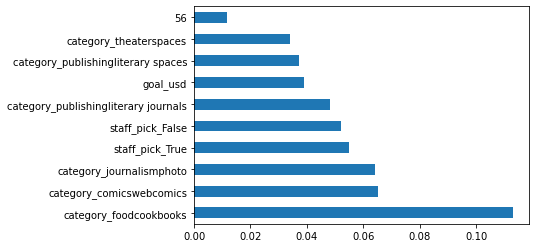

In [50]:
# Decision Trees
from sklearn import tree
#choose from different tunable hyper parameters
clf = tree.DecisionTreeClassifier(max_depth=20,criterion='gini')

# Printing all the parameters of Decision Trees
print(clf)

# Creating the model on Training Data
DTree=clf.fit(X_train,y_train)
prediction=DTree.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(DTree.feature_importances_, index=Predictors.columns)
feature_importances.nlargest(10).plot(kind='barh')

# Importing cross validation function from sklearn
#from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(DTree, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2),
                   learning_rate=0.01, n_estimators=20)
              precision    recall  f1-score   support

      failed       0.72      0.24      0.36       486
  successful       0.81      0.97      0.88      1605

    accuracy                           0.80      2091
   macro avg       0.76      0.61      0.62      2091
weighted avg       0.79      0.80      0.76      2091

[[ 118  368]
 [  47 1558]]
Accuracy of the model on Testing Sample Data: 0.76

Accuracy values for 10-fold Cross Validation:
 [0.66664415 0.66239371 0.63599098 0.784766   0.83254903 0.5247221
 0.85105264 0.84280657 0.66619008 0.6681443 ]

Final Average Accuracy of the model: 0.71


<AxesSubplot:>

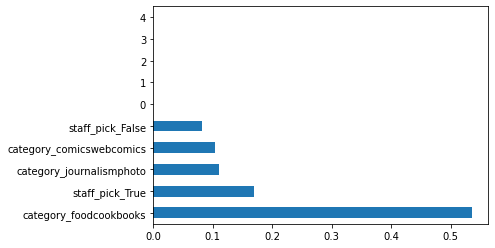

In [51]:
# Adaboost 
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

# Choosing Decision Tree with 1 level as the weak learner
DTC=DecisionTreeClassifier(max_depth=2)
clf = AdaBoostClassifier(n_estimators=20, base_estimator=DTC ,learning_rate=0.01)

# Printing all the parameters of Adaboost
print(clf)

# Creating the model on Training Data
AB=clf.fit(X_train,y_train)
prediction=AB.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(AB, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(AB.feature_importances_, index=Predictors.columns)
feature_importances.nlargest(10).plot(kind='barh')

In [52]:
Don't run

SyntaxError: EOL while scanning string literal (2542750387.py, line 1)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
from keras.wrappers.scikit_learn import KerasClassifier
from keras.models import Sequential
from keras.layers import Dense

# Define the function to create the model
def create_model(nodes=16, activation='relu', optimizer='adam'):
    model = Sequential()
    model.add(Dense(nodes, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dense(nodes//2, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model
epochs = 10

# Define the parameter grid to search over
param_grid = {
    'batch_size': [16, 32, 64],
    'nodes': [8, 16, 32],
    'optimizer': ['adam', 'rmsprop']
}

# Create the Keras classifier
keras_classifier = KerasClassifier(build_fn=create_model, verbose=0)

# Perform grid search
grid = GridSearchCV(keras_classifier, param_grid, cv=3)
grid_result = grid.fit(X_train, y_train_nn)

# Print the best results
print('Best Accuracy: {:.2f}%'.format(grid_result.best_score_*100))
print('Best Parameters: {}'.format(grid_result.best_params_))

# Make predictions on test data
y_pred = grid.predict(X_test)

# Convert predictions to binary values
y_pred = [1 if x>=0.5 else 0 for x in y_pred]

# Calculate evaluation metrics
confusion_mat = confusion_matrix(y_test_nn, y_pred)
precision = precision_score(y_test_nn, y_pred)
recall = recall_score(y_test_nn, y_pred)
f1 = f1_score(y_test_nn, y_pred)

# Print evaluation metrics
print('Confusion Matrix:')
print(confusion_mat)
print('Precision: {:.2f}%'.format(precision*100))
print('Recall: {:.2f}%'.format(recall*100))
print('F1 Score: {:.2f}%'.format(f1*100))


# Mehdi

In [304]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score , accuracy_score
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
import plotly.express as px  
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
import plotly.graph_objects as go 
import graphviz 
from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn.metrics import roc_curve, auc

## Baseline

In [117]:
y_train_binary= (y_train=='successful').astype(int)
y_test_binary = (y_test=='successful').astype(int)

print(y_train_binary.mean())

0.7676374077112387


In [296]:
y_pred_baseline = np.ones(len(y_test_binary)).astype(int)

confusion_mat = confusion_matrix(y_test_binary, y_pred_baseline)

tn , fp , fn , tp = confusion_mat.ravel()
TPR_baseline = tp/(tp+fn)
FPR_baseline = fp/(fp+tn)
ACC_baseline = (tp + tn ) / (tp+tn+fp+fn)
print('confusion matrix')
print(confusion_mat)
print('TPR , FPR , ACC')
print(TPR_baseline,FPR_baseline,ACC_baseline)

confusion matrix
[[   0  486]
 [   0 1605]]
TPR , FPR , ACC
1.0 1.0 0.7675753228120517


## CART

In [189]:
dtc = DecisionTreeClassifier(random_state=42)

dtc.fit(X_train, y_train_binary)

y_pred_dtc = dtc.predict(X_test)

confusion_mat = confusion_matrix(y_test_binary, y_pred_dtc)

tn , fp , fn , tp = confusion_mat.ravel()
TPR_dtc = tp/(tp+fn)
FPR_dtc = fp/(fp+tn)
ACC_dtc = (tp + tn ) / (tp+tn+fp+fn)
print('confusion matrix')
print(confusion_mat)
print('TPR , FPR , ACC')
print(TPR_dtc,FPR_dtc,ACC_dtc)

confusion matrix
[[ 323  163]
 [ 185 1420]]
TPR , FPR , ACC
0.8847352024922118 0.33539094650205764 0.8335724533715926


In [188]:
dtc = DecisionTreeClassifier(criterion = 'gini', max_depth=8, random_state=42)

dtc.fit(X_train, y_train_binary)

y_pred_dtc = dtc.predict(X_test)

confusion_mat = confusion_matrix(y_test_binary, y_pred_dtc)

tn , fp , fn , tp = confusion_mat.ravel()
TPR_dtc = tp/(tp+fn)
FPR_dtc = fp/(fp+tn)
ACC_dtc = (tp + tn ) / (tp+tn+fp+fn)
print('confusion matrix')
print(confusion_mat)
print('TPR , FPR , ACC')
print(TPR_dtc,FPR_dtc,ACC_dtc)

confusion matrix
[[ 320  166]
 [ 153 1452]]
TPR , FPR , ACC
0.9046728971962616 0.34156378600823045 0.8474414155906265


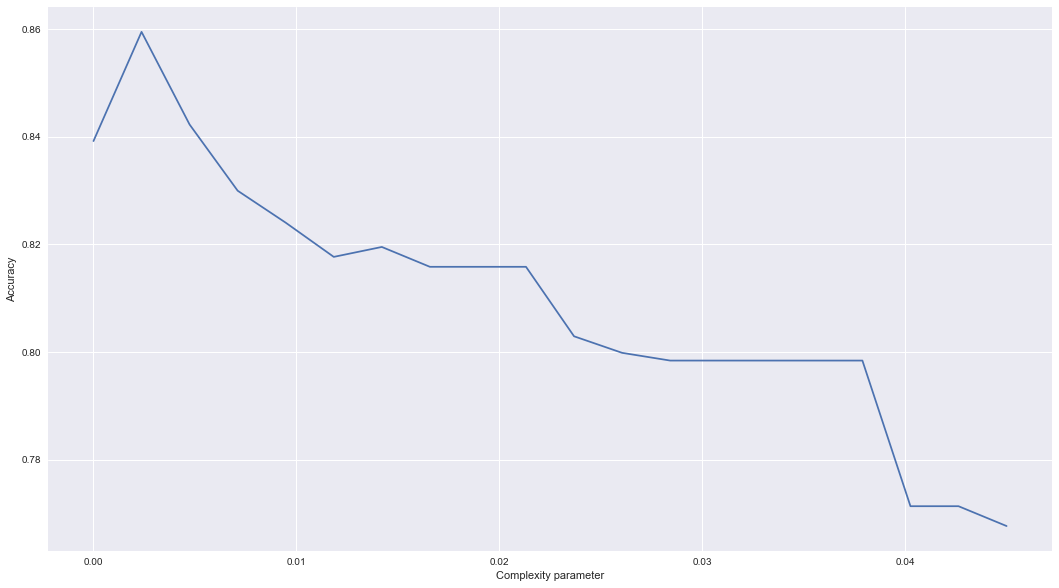

In [199]:
L = []
for cp in np.linspace(0,0.045,20):
    tree_regression = DecisionTreeClassifier(criterion = 'gini', max_depth=8, random_state=42,ccp_alpha=cp)
    L.append([cp,cross_val_score(tree_regression, X_train, y_train, cv=5).mean()])
L=np.array(L)

plt.plot(L[:,0],L[:,1])
plt.xlabel('Complexity parameter')
plt.ylabel('Accuracy')
plt.show()

In [297]:
cp_opt = L[:,0][np.argmax(L[:,1])]

dtc = DecisionTreeClassifier(criterion = 'gini', max_depth=8, random_state=42,ccp_alpha=cp_opt)

dtc.fit(X_train, y_train_binary)

y_pred_dtc = dtc.predict(X_test)

confusion_mat = confusion_matrix(y_test_binary, y_pred_dtc)

tn , fp , fn , tp = confusion_mat.ravel()
TPR_dtc = tp/(tp+fn)
FPR_dtc = fp/(fp+tn)
ACC_dtc = (tp + tn ) / (tp+tn+fp+fn)
print('confusion matrix')
print(confusion_mat)
print('TPR , FPR , ACC')
print(TPR_dtc,FPR_dtc,ACC_dtc)

confusion matrix
[[ 290  196]
 [ 128 1477]]
TPR , FPR , ACC
0.9202492211838006 0.40329218106995884 0.8450502152080345


<AxesSubplot:>

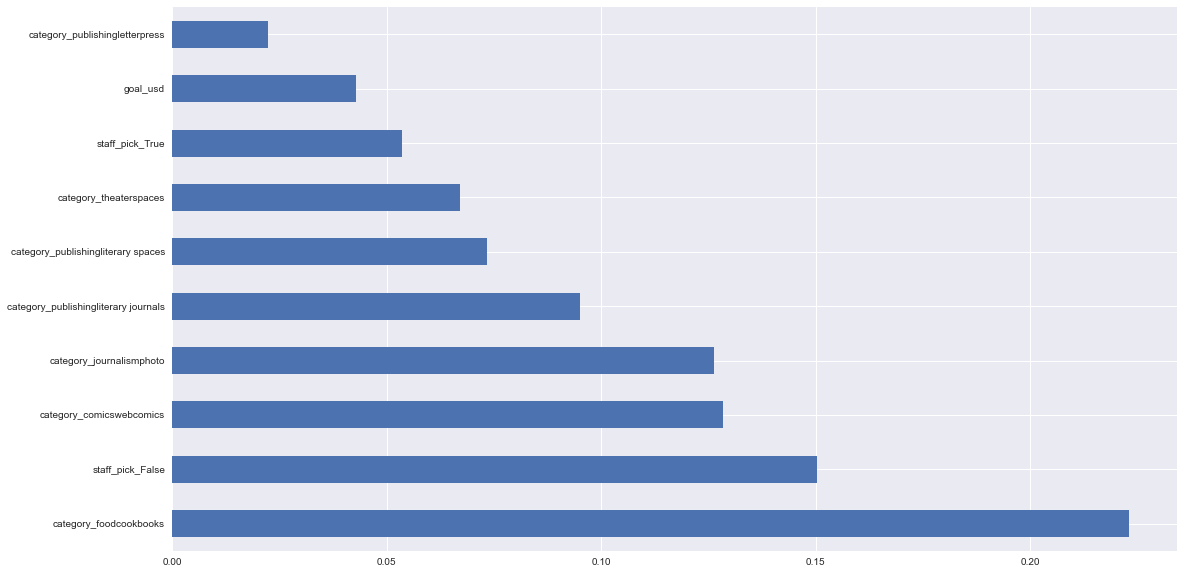

In [211]:
feature_importances = pd.Series(dtc.feature_importances_, index=Predictors.columns)
feature_importances.nlargest(10).plot(kind='barh')

## Random Forest

In [294]:
rf = RandomForestClassifier(random_state=42)

rf.fit(X_train, y_train_binary)

y_pred_rf = rf.predict(X_test)


confusion_mat = confusion_matrix(y_test_binary, y_pred_rf)

tn , fp , fn , tp = confusion_mat.ravel()
TPR_rf = tp/(tp+fn)
FPR_rf = fp/(fp+tn)
ACC_rf = (tp + tn ) / (tp+tn+fp+fn)
print('confusion matrix')
print(confusion_mat)
print('TPR , FPR , ACC')
print(TPR_rf,FPR_rf,ACC_rf)

confusion matrix
[[ 153  333]
 [  58 1547]]
TPR , FPR , ACC
0.9638629283489096 0.6851851851851852 0.8130081300813008


In [295]:
rf = RandomForestClassifier(n_estimators=50,random_state=42,min_samples_split=10)

rf.fit(X_train, y_train_binary)

y_pred_rf = rf.predict(X_test)


confusion_mat = confusion_matrix(y_test_binary, y_pred_rf)

tn , fp , fn , tp = confusion_mat.ravel()
TPR_rf = tp/(tp+fn)
FPR_rf = fp/(fp+tn)
ACC_rf = (tp + tn ) / (tp+tn+fp+fn)
print('confusion matrix')
print(confusion_mat)
print('TPR , FPR , ACC')
print(TPR_rf,FPR_rf,ACC_rf)

confusion matrix
[[ 179  307]
 [  55 1550]]
TPR , FPR , ACC
0.9657320872274143 0.6316872427983539 0.8268770923003348


<AxesSubplot:>

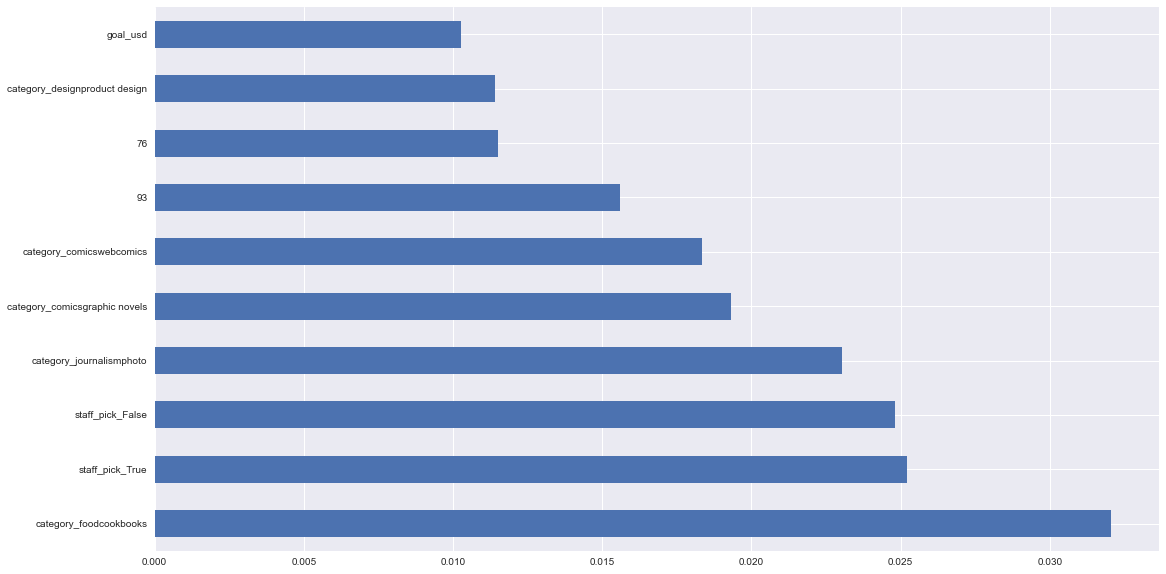

In [312]:
feature_importances = pd.Series(rf.feature_importances_, index=Predictors.columns)
feature_importances.nlargest(10).plot(kind='barh')

## XGBOOST

In [120]:
cl_xgb = xgb.XGBClassifier()

cl_xgb.fit(X_train, y_train_binary)

y_pred = cl_xgb.predict(X_test)

accuracy = accuracy_score(y_test_binary, y_pred)
print('Accuracy: %.2f%%' % (accuracy * 100.0))


Accuracy: 87.76%


In [92]:
# i've run this cell iteratively until i found nice values using coarse search

param_grid = {
    'learning_rate': [0.054210526315789466],
    'max_depth': [8],
    'subsample': [0.9],
    'reg_alpha': [0.1],
    'reg_lambda': [1.0, 2.0, 3.0]
}


grid_search = GridSearchCV(cl_xgb, param_grid, scoring='accuracy', cv=5)
grid_result = grid_search.fit(X_train, y_train_xgb)

# Print the best hyperparameters and the corresponding accuracy
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.882894 using {'learning_rate': 0.054210526315789466, 'max_depth': 8, 'reg_alpha': 0.1, 'reg_lambda': 1.0, 'subsample': 0.9}


In [123]:
cl_xgb = xgb.XGBClassifier(learning_rate=0.054210526315789466,max_depth=8,subsample=0.9,reg_alpha=0.1,reg_lambda=1)


cl_xgb.fit(X_train, y_train_binary)

y_pred_xgb = cl_xgb.predict(X_test)

accuracy = accuracy_score(y_test_binary, y_pred_xgb)
print('Accuracy: %.2f%%' % (accuracy * 100.0))

Accuracy: 88.14%


In [122]:
print(metrics.classification_report(y_test_binary, y_pred_xgb))
print(metrics.confusion_matrix(y_test_binary, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.76      0.72      0.74       486
           1       0.92      0.93      0.92      1605

    accuracy                           0.88      2091
   macro avg       0.84      0.83      0.83      2091
weighted avg       0.88      0.88      0.88      2091

[[ 350  136]
 [ 112 1493]]


In [301]:
confusion_mat = confusion_matrix(y_test_binary, y_pred_xgb)

tn , fp , fn , tp = confusion_mat.ravel()
TPR_xgb = tp/(tp+fn)
FPR_xgb = fp/(fp+tn)
ACC_xgb = (tp + tn ) / (tp+tn+fp+fn)
print('confusion matrix')
print(confusion_mat)
print('TPR , FPR , ACC')
print(TPR_xgb,FPR_xgb,ACC_xgb)

confusion matrix
[[ 350  136]
 [ 112 1493]]
TPR , FPR , ACC
0.9302180685358256 0.27983539094650206 0.8813964610234337


<AxesSubplot:>

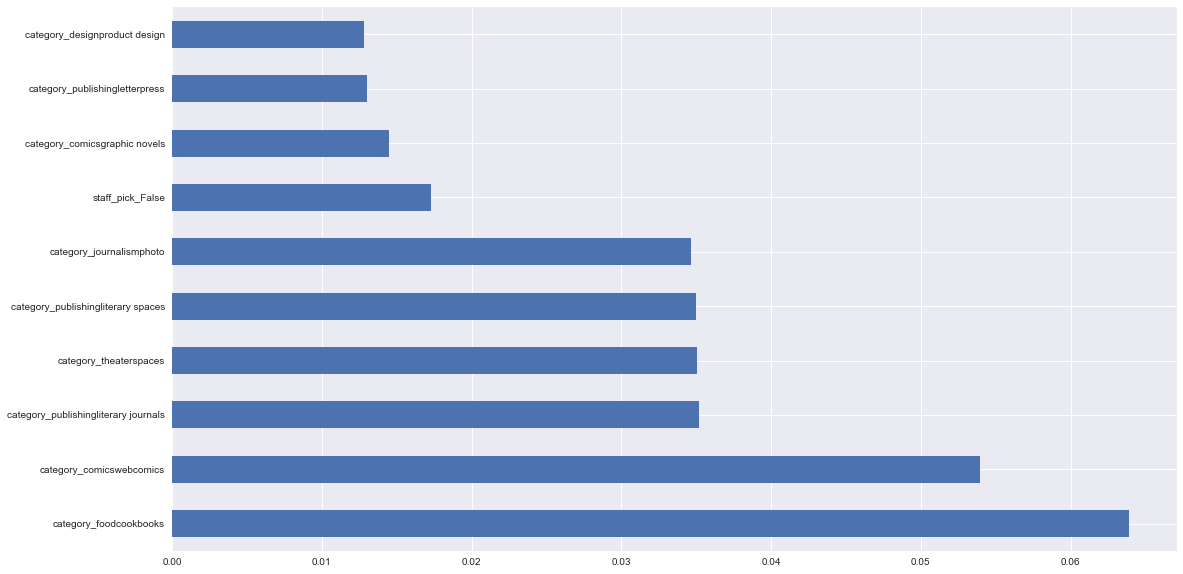

In [212]:
feature_importances = pd.Series(cl_xgb.feature_importances_, index=Predictors.columns)
feature_importances.nlargest(10).plot(kind='barh')

## Comparison

In [303]:
table = pd.DataFrame(columns = ['Accuracy','TPR','FPR'],index = ['Baseline','Decision Tree Classifier','Random Forest','XGBoost'])
table['Accuracy'] = [ACC_baseline,ACC_dtc,ACC_rf,ACC_xgb]
table['TPR'] = [TPR_baseline,TPR_dtc,TPR_rf,TPR_xgb]
table['FPR'] = [FPR_baseline,FPR_dtc,FPR_rf,FPR_xgb]
table

,Accuracy,TPR,FPR
Baseline,0.767575,1.000000,1.000000
Decision Tree Classifier,0.845050,0.920249,0.403292
Random Forest,0.826877,0.965732,0.631687
XGBoost,0.881396,0.930218,0.279835


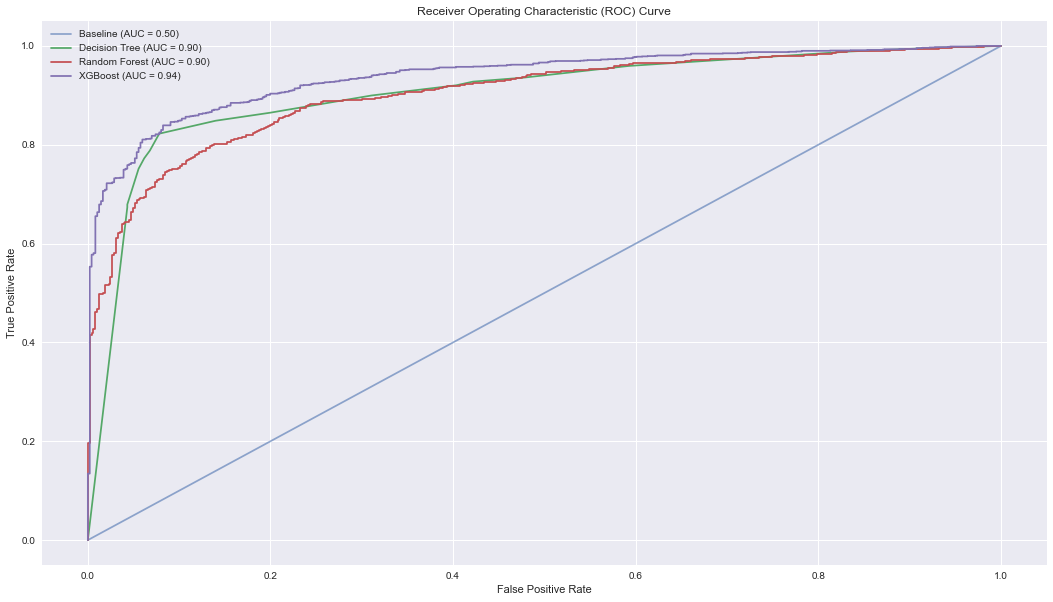

In [317]:
dt_probs = dtc.predict_proba(X_test)[:, 1]
rf_probs = rf.predict_proba(X_test)[:, 1]
xgb_probs = cl_xgb.predict_proba(X_test)[:, 1]
baseline_probs = np.ones(len(y_test))

dt_fpr, dt_tpr, _ = roc_curve(y_test_binary, dt_probs)
rf_fpr, rf_tpr, _ = roc_curve(y_test_binary, rf_probs)
xgb_fpr, xgb_tpr, _ = roc_curve(y_test_binary, xgb_probs)
baseline_fpr, baseline_tpr, _ = roc_curve(y_test_binary, baseline_probs)

dt_auc = auc(dt_fpr, dt_tpr)
rf_auc = auc(rf_fpr, rf_tpr)
xgb_auc = auc(xgb_fpr, xgb_tpr)
baseline_auc = auc(baseline_fpr, baseline_tpr)

# Plot the ROC curve for each model in the same plot
plt.plot(baseline_fpr, baseline_tpr, label='Baseline (AUC = {:.2f})'.format(baseline_auc),alpha=0.6)
plt.plot(dt_fpr, dt_tpr, label='Decision Tree (AUC = {:.2f})'.format(dt_auc))
plt.plot(rf_fpr, rf_tpr, label='Random Forest (AUC = {:.2f})'.format(rf_auc))
plt.plot(xgb_fpr, xgb_tpr, label='XGBoost (AUC = {:.2f})'.format(xgb_auc))

# Set the plot title and axis labels
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# Show the legend and plot
plt.legend()
plt.show()

(2091, 2091)